In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_data = pd.read_csv("SalaryData_Test.csv")
test_data.head()
test_data.shape
test_data.dtypes
test_data.isnull().sum()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train_data = pd.read_csv("SalaryData_Train.csv")
train_data.head()
train_data.shape
train_data.dtypes
train_data.isnull().sum()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
df = pd.concat([test_data,train_data],axis=0)
df.head()
df.shape

(45221, 14)

In [ ]:
df.workclass.value_counts()
df.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [ ]:
df.native.value_counts()
df.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [ ]:
df.occupation.value_counts()
df.occupation.unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [ ]:
df.sex.value_counts()
df.sex.unique()

array([' Male', ' Female'], dtype=object)

<AxesSubplot:xlabel='workclass', ylabel='Count'>

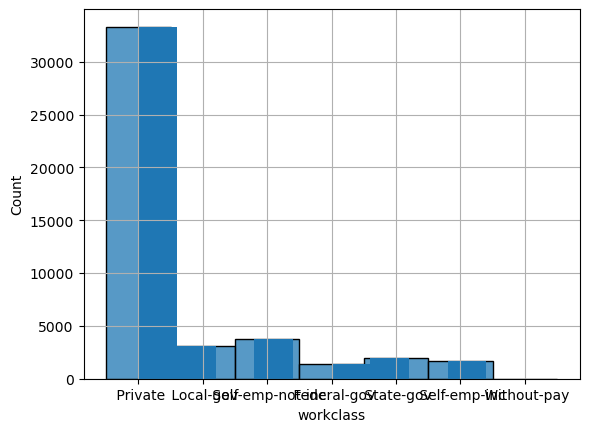

In [ ]:
# EDA
#histogram
sns.histplot(df["workclass"])
df["workclass"].hist()

<AxesSubplot:xlabel='education', ylabel='Count'>

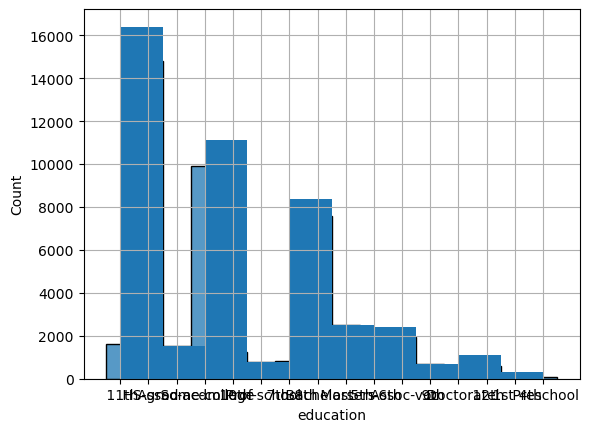

In [ ]:
sns.histplot(df["education"])
df["education"].hist()

<AxesSubplot:xlabel='hoursperweek', ylabel='Count'>

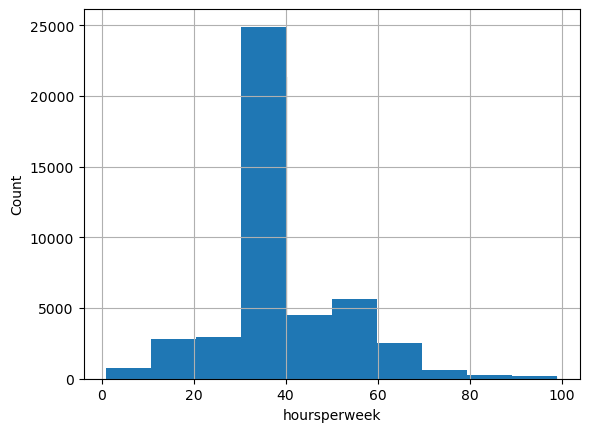

In [ ]:
sns.histplot(df["hoursperweek"])
df["hoursperweek"].hist()

<AxesSubplot:xlabel='native', ylabel='Count'>

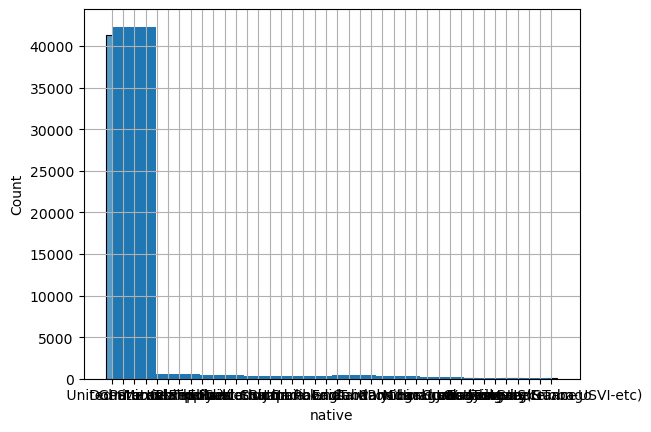

In [ ]:
sns.histplot(df["native"])
df["native"].hist()

<AxesSubplot:xlabel='capitalloss', ylabel='Count'>

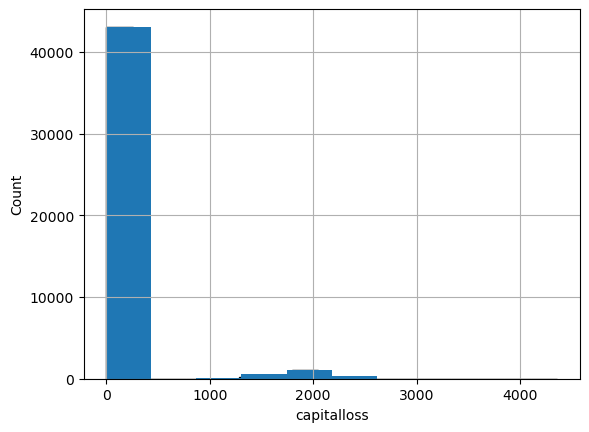

In [ ]:
sns.histplot(df["capitalloss"])
df["capitalloss"].hist()

<AxesSubplot:xlabel='capitalgain', ylabel='Count'>

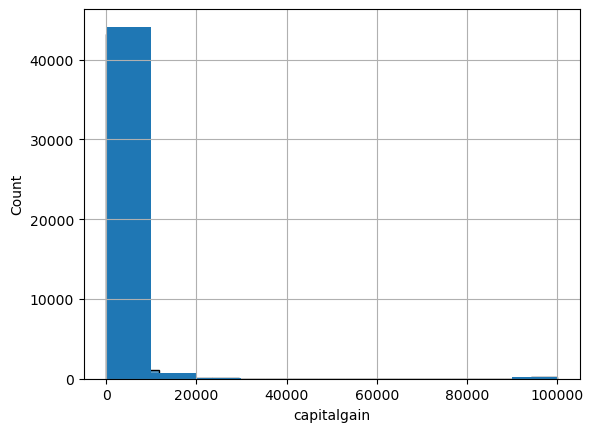

In [ ]:
sns.histplot(df["capitalgain"])
df["capitalgain"].hist()

<AxesSubplot:xlabel='education'>

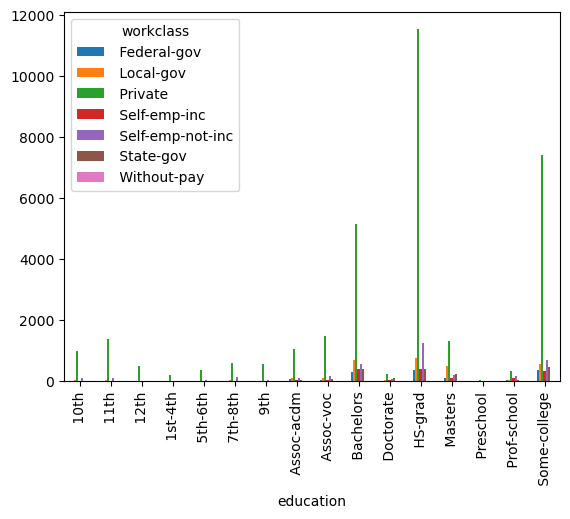

In [ ]:
t1 = pd.crosstab(index=df["education"],columns=df["workclass"])
t1.plot(kind='bar')

<AxesSubplot:xlabel='education'>

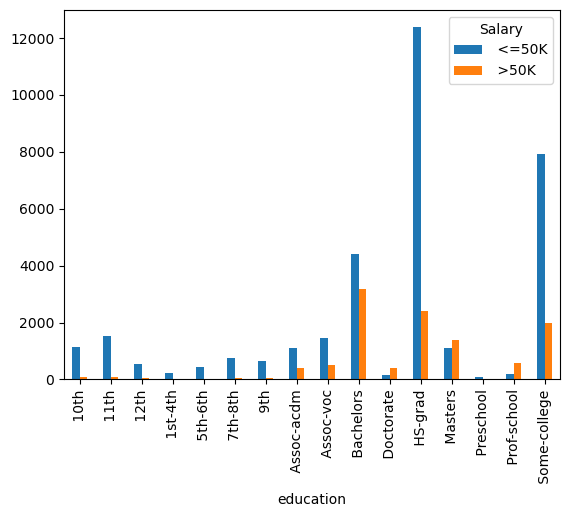

In [ ]:
t2 = pd.crosstab(index=df["education"],columns=df["Salary"])
t2.plot(kind='bar')

<AxesSubplot:xlabel='sex'>

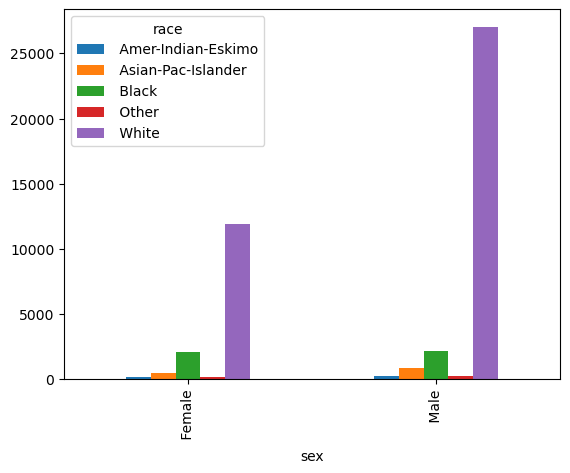

In [ ]:
t3 = pd.crosstab(index=df["sex"],columns=df["race"])
t3.plot(kind='bar')

<AxesSubplot:xlabel='maritalstatus'>

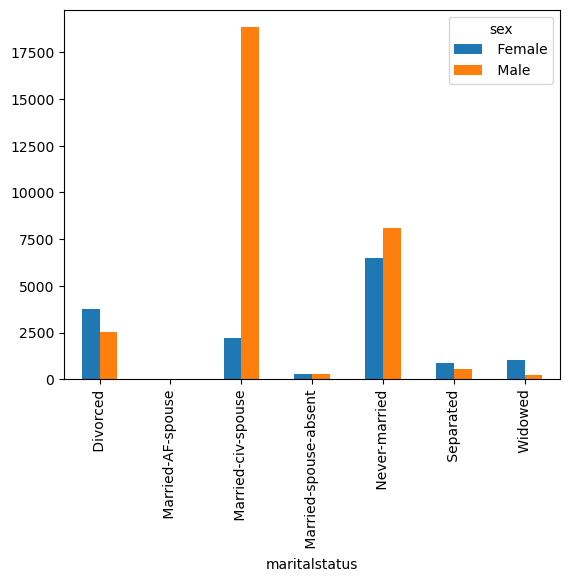

In [ ]:
t4 = pd.crosstab(index=df["maritalstatus"],columns=df["sex"])
t4.plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='capitalgain'>

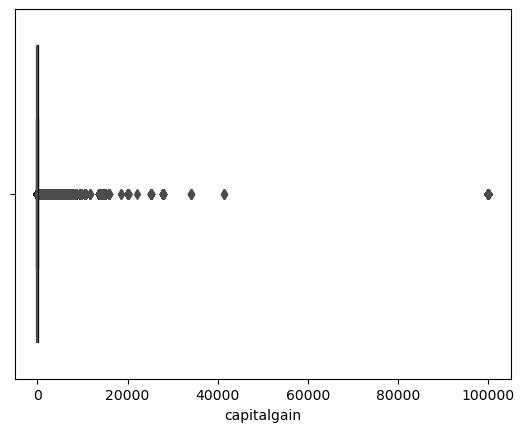

In [ ]:
# box plot
sns.boxplot(df["age"],color="blue")
sns.boxplot(df["hoursperweek"],color="black")
sns.boxplot(df["capitalloss"],color="violet")
sns.boxplot(df["capitalgain"],color="red")

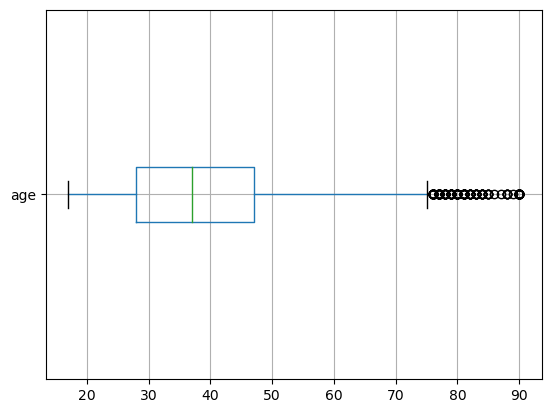

In [ ]:
# removing outliers
df.boxplot("age",vert=False)
Q1=np.percentile(df["age"],25)
Q3=np.percentile(df["age"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["age"]<LW
df[df["age"]<LW]
df[df["age"]<LW].shape
df["age"]>UW
df[df["age"]>UW]
df[df["age"]>UW].shape
df["age"]=np.where(df["age"]>UW,UW,np.where(df["age"]<LW,LW,df["age"]))

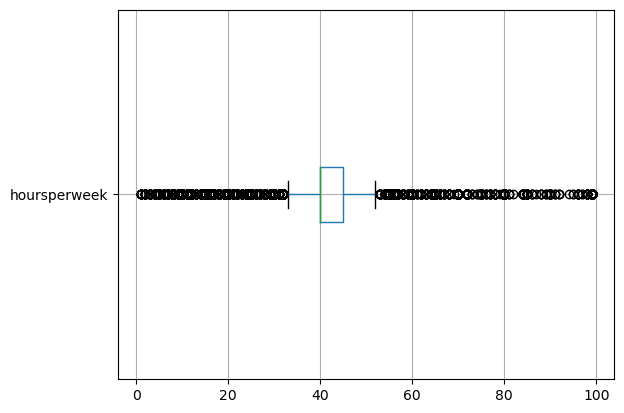

In [ ]:
df.boxplot("hoursperweek",vert=False)
Q1=np.percentile(df["hoursperweek"],25)
Q3=np.percentile(df["hoursperweek"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["hoursperweek"]<LW
df[df["hoursperweek"]<LW]
df[df["hoursperweek"]<LW].shape
df["hoursperweek"]>UW
df[df["hoursperweek"]>UW]
df[df["hoursperweek"]>UW].shape
df["hoursperweek"]=np.where(df["hoursperweek"]>UW,UW,np.where(df["hoursperweek"]<LW,LW,df["hoursperweek"]))

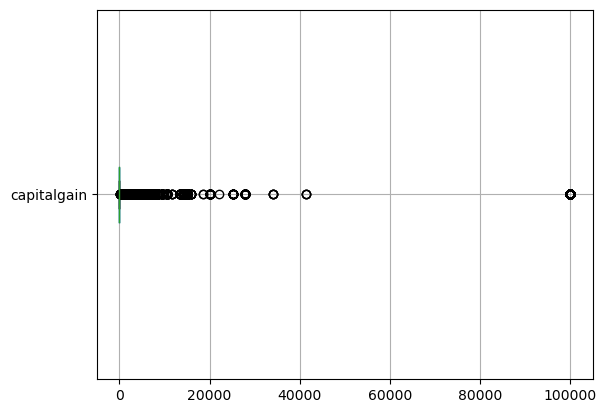

In [ ]:
df.boxplot("capitalgain",vert=False)
Q1=np.percentile(df["capitalgain"],25)
Q3=np.percentile(df["capitalgain"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["capitalgain"]<LW
df[df["capitalgain"]<LW]
df[df["capitalgain"]<LW].shape
df["capitalgain"]>UW
df[df["capitalgain"]>UW]
df[df["capitalgain"]>UW].shape
df["capitalgain"]=np.where(df["capitalgain"]>UW,UW,np.where(df["capitalgain"]<LW,LW,df["capitalgain"]))

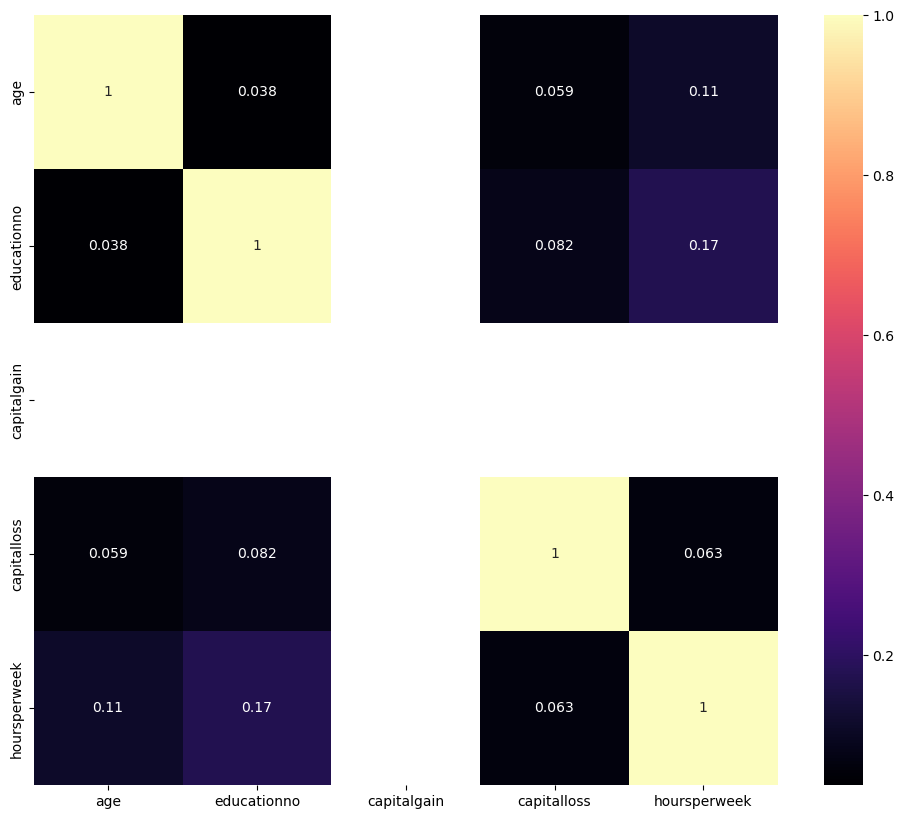

In [ ]:
# correlation
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap="magma")  # heat map
plt.show()

In [ ]:
# with the following function i will select the highly correlated features
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
        return(col_corr)

In [ ]:
corr_features = correlation(df,0.85)
len(set(corr_features))

corr_features # there is no hhighly correlated features

set()

In [ ]:
# Check Correlation amoung parameters
corr = df.corr()
df.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037624,NaN,0.059487,0.111509
educationno,0.037624,1.000000,NaN,0.081741,0.174783
capitalgain,NaN,NaN,NaN,NaN,NaN
capitalloss,0.059487,0.081741,NaN,1.000000,0.063283
hoursperweek,0.111509,0.174783,NaN,0.063283,1.000000


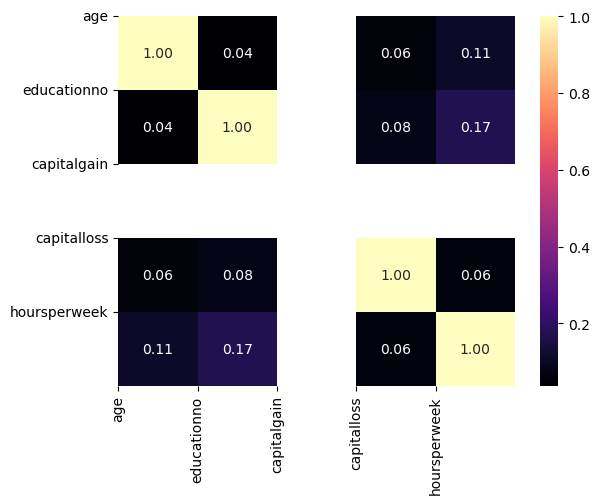

In [ ]:
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,10,37,0
1,21,2,11,8,2,4,0,4,1,0,0,20,37,0
2,11,1,7,11,2,10,0,4,1,0,0,10,37,1
3,27,2,15,9,2,6,0,2,1,0,0,10,37,1
4,17,2,0,5,4,7,1,4,1,0,0,0,37,0


In [ ]:
drop_elements = ['education', 'native', 'Salary']
x = df.drop(drop_elements, axis=1)
y = df['Salary']

In [ ]:
#Data partition
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
#support Vector machine

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

# make predictions
y_pred = svc.predict(x_test)

# summarize the fit of the model
from sklearn import metrics
from sklearn.metrics import accuracy_score,accuracy_score,confusion_matrix
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10247
           1       0.73      0.38      0.50      3320

    accuracy                           0.81     13567
   macro avg       0.78      0.67      0.69     13567
weighted avg       0.80      0.81      0.79     13567

[[9772  475]
 [2061 1259]]
Accuracy: 0.8130758458023144
Precision: 0.7260668973471741
Recall: 0.37921686746987954


In [ ]:
svc = SVC(kernel='rbf',gamma=2, C=1)
svc.fit(x_train, y_train)

# make predictions
prediction = svc.predict(x_test)

# summarize the fit of the model

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87     10247
           1       0.64      0.17      0.27      3320

    accuracy                           0.77     13567
   macro avg       0.71      0.57      0.57     13567
weighted avg       0.75      0.77      0.72     13567

[[9927  320]
 [2751  569]]
Accuracy: 0.7736419252598217
Precision: 0.6400449943757031
Recall: 0.1713855421686747


In [ ]:
svc = SVC(kernel='poly',degree=3,gamma="scale")
svc.fit(x_train, y_train)
# make predictions
prediction = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10247
           1       0.73      0.39      0.51      3320

    accuracy                           0.82     13567
   macro avg       0.78      0.67      0.70     13567
weighted avg       0.81      0.82      0.79     13567

[[9776  471]
 [2023 1297]]
Accuracy: 0.8161715928355568
Precision: 0.7335972850678733
Recall: 0.3906626506024096


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

#prediction
y_pred_test = logreg.predict(x_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10247
           1       0.73      0.39      0.51      3320

    accuracy                           0.82     13567
   macro avg       0.78      0.67      0.70     13567
weighted avg       0.81      0.82      0.79     13567

[[9776  471]
 [2023 1297]]
Accuracy: 0.8161715928355568
Precision: 0.7335972850678733
Recall: 0.3906626506024096


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred_test = classifier.predict(x_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10247
           1       0.73      0.39      0.51      3320

    accuracy                           0.82     13567
   macro avg       0.78      0.67      0.70     13567
weighted avg       0.81      0.82      0.79     13567

[[9776  471]
 [2023 1297]]
Accuracy: 0.8161715928355568
Precision: 0.7335972850678733
Recall: 0.3906626506024096
